In [1]:
from metrics import BinaryMetrics
import torch
import torchvision.transforms as transforms
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import os
import seaborn as sns
import numpy as np

from utils import generate_mask_path, generate_mask_df

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


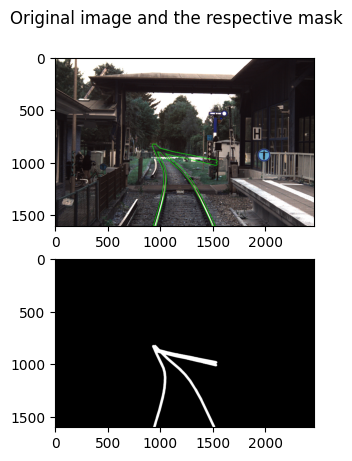

In [2]:
path_image = "../rail_detection/datasets/data_rgb/train/images/10_station_suelldorf_10.1_rgb_center_216_1631703820.700000000.png"
path_label = "../rail_detection/datasets/data_rgb/train/labels/10_station_suelldorf_10.1_rgb_center_216_1631703820.700000000.txt"
mask = generate_mask_path(path_image=path_image, path_label=path_label, print=True)

In [3]:
df = pd.read_json(max(glob("./dataframe_dumps/df_eda_*"), key=os.path.getmtime))
df = df[df["sensor"] == "rgb_highres_center"]

C:\Users\atkovacs\AppData\Local\Temp\ipykernel_11844\5639941.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df = pd.read_json(max(glob("./dataframe_dumps/df_eda_*"), key=os.path.getmtime))


In [4]:
target = df.sample(1)

pred = []
for i in range(5):
    pred.append(df.sample(1))

8_station_altona_8.2/rgb_highres_center/201_1631700829.200000027.png
8_station_altona_8.2/rgb_highres_center/158_1631700824.900000025.png
1_calibration_1.2/rgb_highres_center/040_1631441718.100000021.png
9_station_ruebenkamp_9.6/rgb_highres_center/105_1631712794.600000017.png
12_vegetation_steady_12.1/rgb_highres_center/076_1631177227.700000005.png
8_station_altona_8.1/rgb_highres_center/095_1631700818.600000019.png


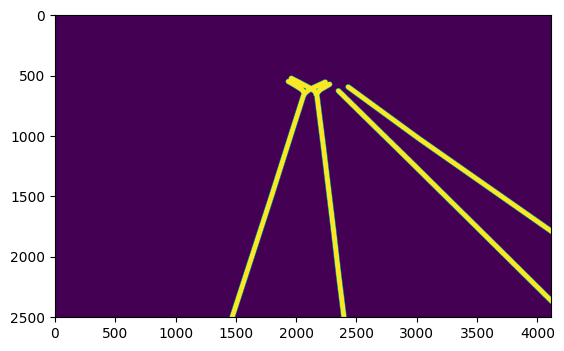

In [5]:
target_mask = (
    cv2.cvtColor(
        generate_mask_df(df, file=target.path.values[0], path="./orig_data/DB/"),
        cv2.COLOR_BGR2GRAY,
    )
    / 255
)
pred_mask = []

for i in range(len(pred)):
    pred_mask.append(
        cv2.cvtColor(
            generate_mask_df(df, file=pred[i].path.values[0], path="./orig_data/DB/"),
            cv2.COLOR_BGR2GRAY,
        )
        / 255
    )

pred_mask.append(np.zeros_like(target_mask).astype(np.float32))

plt.imshow(target_mask)

(2504, 4112)
(2504, 4112)
(2504, 4112)
(2504, 4112)
(2504, 4112)
(2504, 4112)


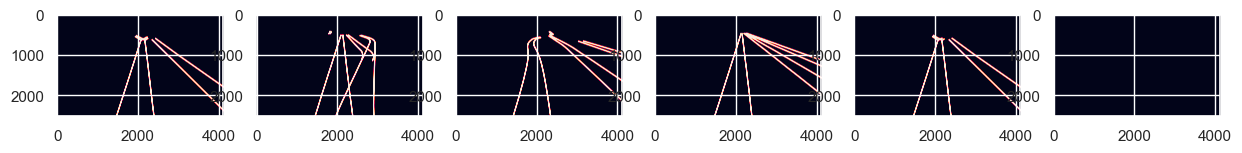

In [9]:
sns.set(rc={"figure.figsize": (15, 15)})

fig, ax = plt.subplots(1, len(pred_mask))
# fig.suptitle("Data split per dataset: train, validation, test")

for i in range(len(pred_mask)):
    print(pred_mask[i].shape)
    ax[i].imshow(pred_mask[i])

In [10]:
transform = transforms.Compose([transforms.ToTensor()])

In [11]:
target_tensor = transform(target_mask)
target_tensor = target_tensor[None, :]
target_tensor.shape

torch.Size([1, 1, 2504, 4112])

In [12]:
pred_tensor = []
for i in range(len(pred_mask)):
    tmp = transform(pred_mask[i])
    pred_tensor.append(tmp[None, :])
    print(pred_tensor[-1].shape)

torch.Size([1, 1, 2504, 4112])
torch.Size([1, 1, 2504, 4112])
torch.Size([1, 1, 2504, 4112])
torch.Size([1, 1, 2504, 4112])
torch.Size([1, 1, 2504, 4112])
torch.Size([1, 1, 2504, 4112])


In [13]:
bm = BinaryMetrics()

In [14]:
for i in range(len(pred_tensor)):
    pixel_acc, dice, precision, specificity, recall, f1_score, iou = bm(
        y_pred=pred_tensor[i], y_true=target_tensor
    )
    print(
        f"""
        pixel_acc: {pixel_acc:.4f}
        dice: {dice:.4f}
        precision: {precision:.4f}
        specificity: {specificity:.4f}
        recall: {recall:.4f}
        f1_score: {f1_score:.4f}
        iou: {iou:.4f}
        ------------------------------------
        """
    )


        pixel_acc: 0.9983
        dice: 0.9775
        precision: 0.9812
        specificity: 0.9993
        recall: 0.9738
        f1_score: 0.9775
        iou: 0.9559
        ------------------------------------
        

        pixel_acc: 0.9499
        dice: 0.3762
        precision: 0.3557
        specificity: 0.9716
        recall: 0.3992
        f1_score: 0.3762
        iou: 0.2317
        ------------------------------------
        

        pixel_acc: 0.9205
        dice: 0.0567
        precision: 0.0514
        specificity: 0.9542
        recall: 0.0633
        f1_score: 0.0568
        iou: 0.0292
        ------------------------------------
        

        pixel_acc: 0.9435
        dice: 0.3703
        precision: 0.3201
        specificity: 0.9633
        recall: 0.4392
        f1_score: 0.3703
        iou: 0.2272
        ------------------------------------
        

        pixel_acc: 0.9979
        dice: 0.9714
        precision: 0.9787
        specificity: 0.9992
  